### Perceptron
(Artificial Neuron)

- A perceptron is a single layer neural network

- It acts as a Linear classifier, Binary classification

- Loss function : Binary cross entropy
(-ve of log likelihood)



In [1]:
import  numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons

### generating data

In [6]:
X,Y = make_blobs(n_samples=500,n_features=2,centers=2,random_state=3)
print(X.shape,Y.shape)

(500, 2) (500,)


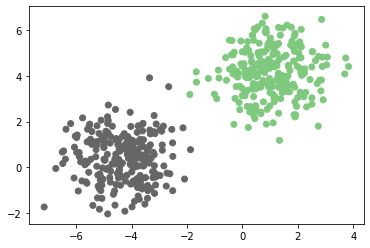

In [8]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

## Perceptron implementation - part 1
### Model and helper function

In [11]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
def predict(X,weights):
    return sigmoid(np.dot(X,weights))

def loss(X,y,weights):
    """ Binary cross entropy """
    y_ = predict(X,weights)
    error = np.mean(y*np.log(y_) + (1-y)*np.log(1-y_))

    return -error

def gradient(X,y,weights):
    y_ = predict(X,weights)

    grad = np.dot(X.T,(y_ - y))
    return grad/X.shape[0]

def gradientsecent(X,y,learning_rate=0.01,maxiters=300):
    one = np.ones((X.shape[0],1))
    X_ = np.hstack((one,X))
    weights = np.zeros((X_.shape[1],))
    # weights = np.array([0,0,-1,2])  Quiz on perceptrons
    error_list = []
    for i in range(maxiters):
        if i%10 == 0:
            l = loss(X_,y,weights)
            print("Loss",i,"-->",loss(X_,y,weights))
            error_list.append(l)

        # Update rule
        weights = weights - learning_rate*gradient(X_,y,weights)

    return weights,error_list

In [12]:
weights,error_list = gradientsecent(X,Y)

Loss 0 --> 0.6116496416598409
Loss 10 --> 0.5931138457333212
Loss 20 --> 0.5757428085560683
Loss 30 --> 0.5594512066619577
Loss 40 --> 0.5441604845897448
Loss 50 --> 0.5297983294241628
Loss 60 --> 0.5162981700706567
Loss 70 --> 0.5035987064464427
Loss 80 --> 0.4916434711387819
Loss 90 --> 0.48038042422846694
Loss 100 --> 0.4697615807239834
Loss 110 --> 0.4597426692490607
Loss 120 --> 0.45028282015138754
Loss 130 --> 0.44134428095762135
Loss 140 --> 0.4328921570166131
Loss 150 --> 0.42489417519483097
Loss 160 --> 0.41732046857597926
Loss 170 --> 0.41014338024289765
Loss 180 --> 0.40333728436477734
Loss 190 --> 0.39687842296369796
Loss 200 --> 0.39074475688324384
Loss 210 --> 0.38491582962352067
Loss 220 --> 0.3793726428385391
Loss 230 --> 0.37409754241243376
Loss 240 --> 0.3690741141400976
Loss 250 --> 0.3642870881358982
Loss 260 --> 0.35972225118188456
Loss 270 --> 0.3553663663051797
Loss 280 --> 0.3512070989440065
Loss 290 --> 0.34723294912392383


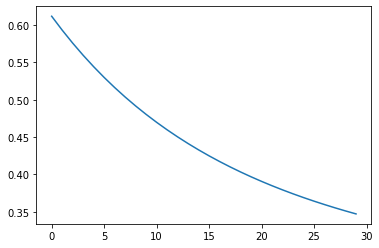

In [13]:
plt.plot(error_list)

## Perceptron implementation - part 2
- Make predictions

- Visualise decision Surface

- Linear vs None-linear classification

In [14]:
def getprediction(X_test,weights,labels=True):
    if X_test.shape[1] != weights.shape[0]:
        one = np.ones((X_test.shape[0],1))
        X_test = np.hstack((one,X_test))


    probs = predict(X_test,weights)

    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        labels[probs<0.5] = 0
        return labels

In [15]:
getprediction(X,weights)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
def plotdecsurf(weights):
    x1 = np.linspace(-5,10,10)
    x2 = -(weights[1]*x1 + weights[0])/weights[2]
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.plot(x1,x2,color='red')
    plt.show()

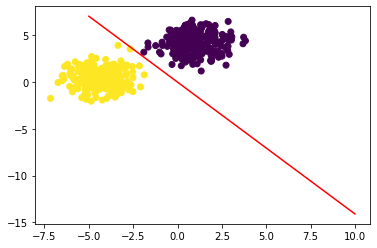

In [23]:
plotdecsurf(weights)

In [24]:
# find the accuracy
y_ = getprediction(X,weights)

acc = (np.sum(Y == y_)/y_.shape[0])*100

In [25]:
acc

100.0

In [29]:

X_m,Y_m = make_moons(n_samples=500,noise=0.2,random_state=1)

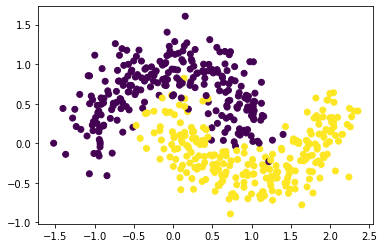

In [30]:
# plt.scatter(X_m[:,0],X_m[:,1],c=Y_m)

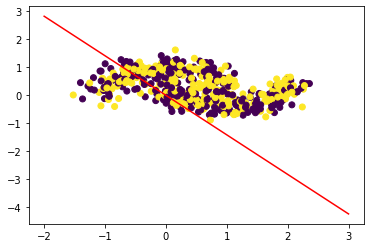

In [35]:
x1 = np.linspace(-2,3,10)
x2 = -(weights[1]*x1 + weights[0])/weights[2]
plt.scatter(X_m[:,0],X_m[:,1],c=Y)
plt.plot(x1,x2,color='red')
plt.show()

In [2]:

X = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])

In [3]:
Y = np.array([0,1,1,1,1,1,1,1])

In [4]:
X.shape

(8, 3)

In [6]:
Y.shape

(8,)

In [16]:

weights

array([ 0.51830289,  0.41837693, -0.46309714,  2.16867308])